In [3]:
# librerias
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound

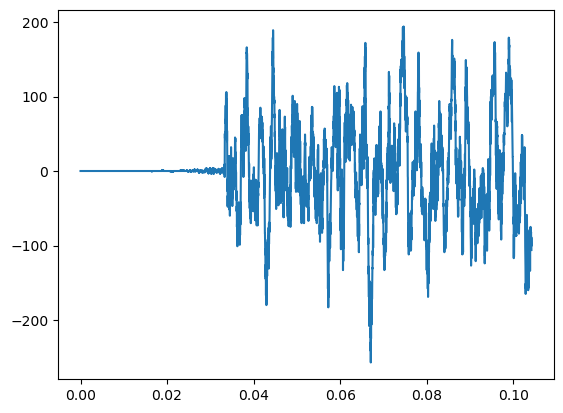

In [4]:
%matplotlib inline

filename='7.data/grabacion.wav'                                
winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar
Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
# Audio_m = data[:,0]       
Audio_m = data[0:5000]

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)
plt.show()

<IPython.core.display.Javascript object>


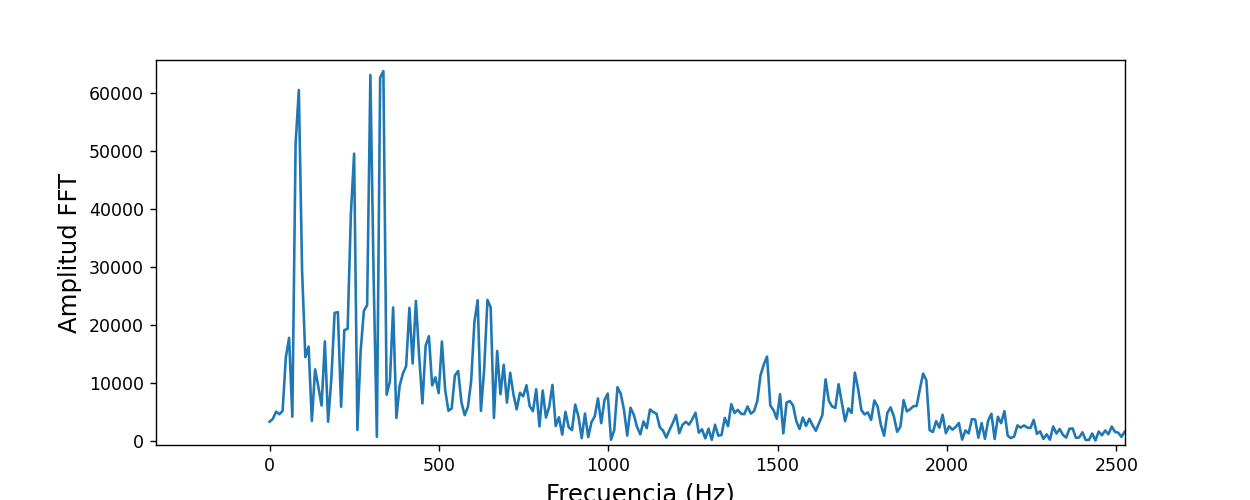

In [5]:
%matplotlib notebook

gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.figure(figsize=(10, 4))
plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

Periodo de la portadora: 0.00025


<IPython.core.display.Javascript object>


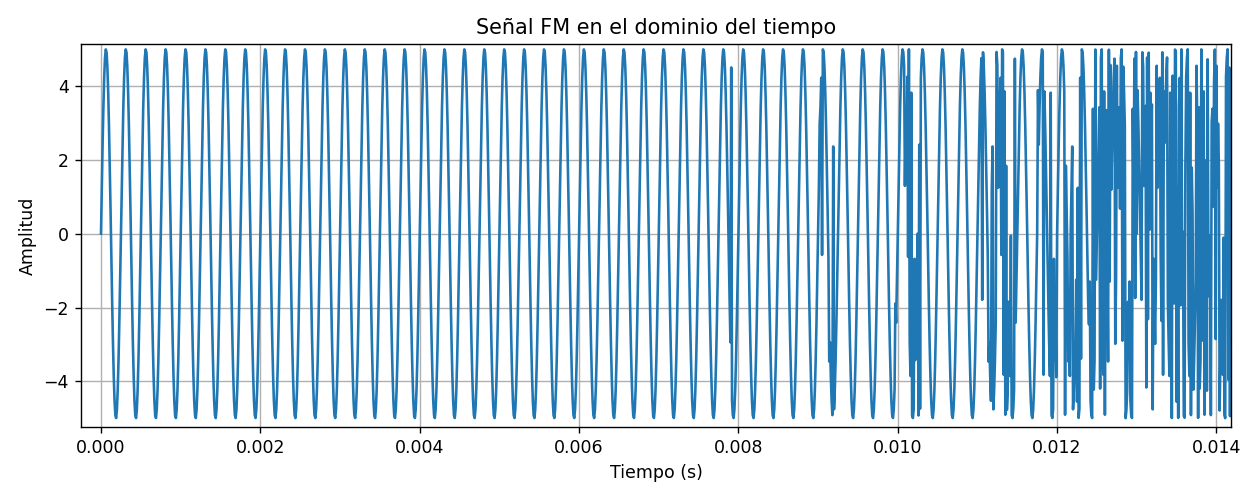

In [6]:
%matplotlib notebook
# Escala de tiempo
Ts = 0.00001  # 10 us
Fs = 1 / Ts   # Frecuencia de muestreo
n = Ts * np.arange(0, 5000)  # Vector de tiempo

a = 2
# Señal FM modulada
A = 5
fc = 4000
print("Periodo de la portadora:", 1/fc)
fi = A * np.sin(2 * np.pi * fc * n + a*Audio_m)

# Plot en dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(n, fi)
plt.title("Señal FM en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


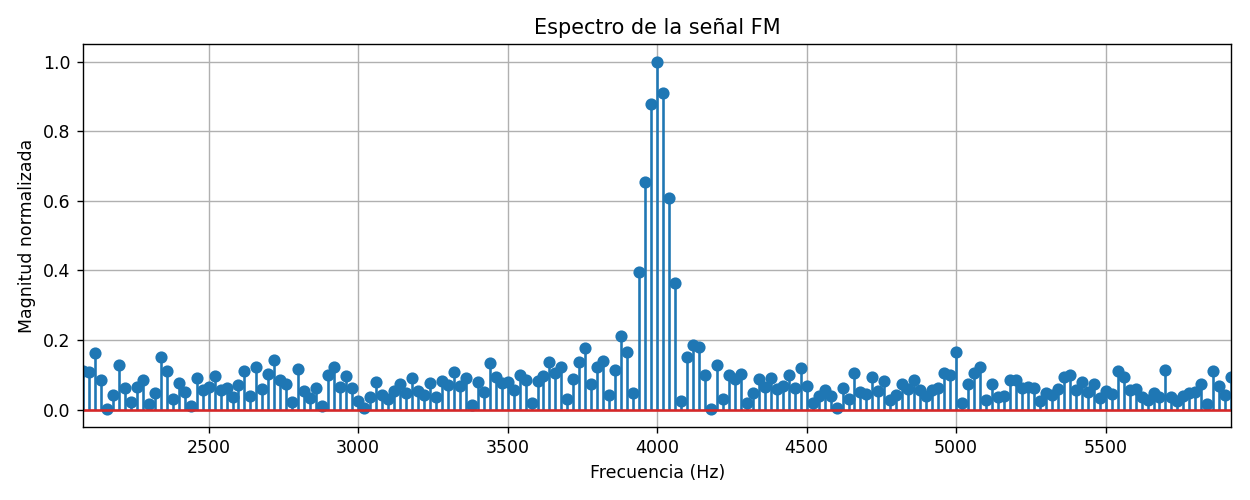

In [7]:
%matplotlib notebook
# Análisis en frecuencia con FFT
N = len(fi)
Fi = fourier.fft(fi)
# f = np.linspace(-Fs/2, Fs/2, N)
f = Fs*np.arange(0, len(fi))/len(fi)
fm = 384
# Espectro normalizado
plt.figure(figsize=(10, 4))
plt.stem(f, np.abs(Fi)/np.max(np.abs(Fi)))
plt.title("Espectro de la señal FM")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud normalizada")
plt.grid(True)
plt.xlim(fc - 5*fm, fc + 5*fm)
plt.tight_layout()
plt.show()